In [ ]:
# pour activer l'accès au drive:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
# Based on common Kaggle dataset structures, assuming 'finance_economics_dataset.csv'
# is the main data file within the specified Kaggle dataset.
file_path = "finance_economics_dataset.csv"

# Load the latest version
df_kaggle = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "khushikyad001/finance-and-economics-dataset-2000-present",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records from KaggleHub dataset:")
display(df_kaggle.head())

Using Colab cache for faster access to the 'finance-and-economics-dataset-2000-present' dataset.
First 5 records from KaggleHub dataset:


,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
0,2000-01-01,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,...,1.04,119.87,47.20,1052.34,390.23,2229,2.12,3,76.64,4589
1,2000-01-02,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,...,1.00,98.22,52.84,1957.73,346.23,4156,1.40,21,5.67,10101
2,2000-01-03,Dow Jones,1987.92,1985.26,2022.28,1978.37,315284661,5.54,9.13,2.60,...,0.83,80.13,78.80,2339.49,439.46,340,0.79,48,39.43,13665
3,2000-01-04,Dow Jones,4625.02,4660.47,4665.26,4595.46,13098297,10.00,3.77,2.20,...,0.95,149.15,28.18,1308.54,213.07,8456,4.22,16,12.83,5192
4,2000-01-05,S&P 500,1998.18,1982.18,2044.31,1966.44,385306746,1.53,2.20,8.20,...,1.43,113.71,92.20,2210.08,405.49,1596,2.21,34,86.37,10688


In [ ]:
file_path = '/content/finance_economics_dataset.csv'

try:
    with open(file_path, 'r') as f:
        print(f"Content of '{file_path}' (first 10 lines):\n")
        for i, line in enumerate(f):
            print(line.strip())
            if i >= 9: # Print first 10 lines
                break
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred while reading the file: {e}")

Content of '/content/finance_economics_dataset.csv' (first 10 lines):

{"detail":"Access denied","reason":"Backend denied access"}


In [ ]:
# 1. IMPORTATION DES BIBLIOTHÈQUES
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Modules Scikit-Learn spécifiques
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Configuration pour des graphiques plus esthétiques
import matplotlib
matplotlib.use('Agg')  # Mode non-interactif
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("1. Bibliothèques importées avec succès.")
print("=" * 80 + "\n")


1. Bibliothèques importées avec succès.



In [ ]:
# 2. CHARGEMENT DES DONNÉES FINANCIÈRES
# ------------------------------------------------------------------------------
print("2. Chargement des données financières...")

# Utilisation du DataFrame 'df_kaggle' déjà chargé
df = df_kaggle.copy()

print(f"   ✓ Données chargées : {df.shape[0]} lignes, {df.shape[1]} colonnes")
print(f"   ✓ Période : {df['Date'].min()} à {df['Date'].max()}")
print(f"\n   Colonnes disponibles :")
for i, col in enumerate(df.columns, 1):
    print(f"      {i:2d}. {col}")
print()

2. Chargement des données financières...
   ✓ Données chargées : 3000 lignes, 24 colonnes
   ✓ Période : 2000-01-01 à 2008-03-18

   Colonnes disponibles :
       1. Date
       2. Stock Index
       3. Open Price
       4. Close Price
       5. Daily High
       6. Daily Low
       7. Trading Volume
       8. GDP Growth (%)
       9. Inflation Rate (%)
      10. Unemployment Rate (%)
      11. Interest Rate (%)
      12. Consumer Confidence Index
      13. Government Debt (Billion USD)
      14. Corporate Profits (Billion USD)
      15. Forex USD/EUR
      16. Forex USD/JPY
      17. Crude Oil Price (USD per Barrel)
      18. Gold Price (USD per Ounce)
      19. Real Estate Index
      20. Retail Sales (Billion USD)
      21. Bankruptcy Rate (%)
      22. Mergers & Acquisitions Deals
      23. Venture Capital Funding (Billion USD)
      24. Consumer Spending (Billion USD)



In [ ]:
display(df_kaggle.head())

,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
0,2000-01-01,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,...,1.04,119.87,47.20,1052.34,390.23,2229,2.12,3,76.64,4589
1,2000-01-02,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,...,1.00,98.22,52.84,1957.73,346.23,4156,1.40,21,5.67,10101
2,2000-01-03,Dow Jones,1987.92,1985.26,2022.28,1978.37,315284661,5.54,9.13,2.60,...,0.83,80.13,78.80,2339.49,439.46,340,0.79,48,39.43,13665
3,2000-01-04,Dow Jones,4625.02,4660.47,4665.26,4595.46,13098297,10.00,3.77,2.20,...,0.95,149.15,28.18,1308.54,213.07,8456,4.22,16,12.83,5192
4,2000-01-05,S&P 500,1998.18,1982.18,2044.31,1966.44,385306746,1.53,2.20,8.20,...,1.43,113.71,92.20,2210.08,405.49,1596,2.21,34,86.37,10688


In [ ]:
# 3. EXPLORATION INITIALE
# ------------------------------------------------------------------------------
print("=" * 80)
print("3. Exploration initiale des données")
print("=" * 80)

print("\n📊 Aperçu des premières lignes :")
print(df.head())

print("\n📈 Statistiques descriptives :")
print(df.describe())

print(f"\n🔍 Valeurs manquantes initiales :")
missing = df.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("   ✓ Aucune valeur manquante détectée !")
print()

3. Exploration initiale des données

📊 Aperçu des premières lignes :
         Date Stock Index  Open Price  Close Price  Daily High  Daily Low  \
0  2000-01-01   Dow Jones     2128.75      2138.48     2143.70    2100.55   
1  2000-01-02     S&P 500     2046.82      2036.18     2082.83    2009.53   
2  2000-01-03   Dow Jones     1987.92      1985.26     2022.28    1978.37   
3  2000-01-04   Dow Jones     4625.02      4660.47     4665.26    4595.46   
4  2000-01-05     S&P 500     1998.18      1982.18     2044.31    1966.44   

   Trading Volume  GDP Growth (%)  Inflation Rate (%)  Unemployment Rate (%)  \
0         2670411           -0.37                6.06                   6.10   
1       690220415            3.19                4.95                   6.62   
2       315284661            5.54                9.13                   2.60   
3        13098297           10.00                3.77                   2.20   
4       385306746            1.53                2.20               

In [ ]:
display(df.describe())

,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),Interest Rate (%),Consumer Confidence Index,...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
count,3000.000000,3000.000000,3000.000000,3000.00000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2982.094607,2981.249173,3018.887777,2944.32975,5.033864e+08,2.608903,5.096830,8.663787,5.218237,85.036000,...,1.146113,115.115233,85.539953,1655.167877,300.554457,5099.546667,5.007413,24.598667,49.955197,7551.278000
std,1151.862689,1151.783841,1151.683485,1151.83490,2.859004e+08,4.287337,2.910513,3.737536,2.726115,20.224829,...,0.201128,20.111351,37.847063,492.177706,114.601328,2898.714108,2.866466,14.301344,28.722592,4203.705678
min,1000.050000,954.520000,1012.130000,917.17000,1.636024e+06,-5.000000,0.010000,2.000000,0.500000,50.000000,...,0.800000,80.010000,20.040000,800.160000,100.130000,107.000000,0.010000,0.000000,0.100000,101.000000
25%,1994.982500,1997.425000,2035.952500,1955.39750,2.545224e+08,-1.012500,2.607500,5.450000,2.890000,68.000000,...,0.980000,98.267500,52.590000,1226.737500,202.370000,2503.750000,2.570000,12.000000,25.762500,3950.750000
50%,2970.780000,2977.180000,3006.520000,2939.24500,5.033710e+08,2.725000,5.110000,8.710000,5.250000,86.000000,...,1.140000,114.795000,85.080000,1666.060000,299.885000,5123.500000,5.060000,25.000000,49.840000,7610.000000
75%,3974.690000,3982.082500,4015.217500,3934.08750,7.537963e+08,6.242500,7.600000,11.882500,7.492500,103.000000,...,1.320000,132.455000,119.150000,2080.730000,399.137500,7616.250000,7.482500,37.000000,74.825000,11148.750000
max,4998.230000,5034.130000,5076.190000,4977.06000,9.999771e+08,10.000000,10.000000,15.000000,10.000000,119.000000,...,1.500000,149.960000,149.870000,2499.660000,499.920000,9998.000000,10.000000,49.000000,99.990000,14990.000000


In [ ]:
# 4. CRÉATION DE LA VARIABLE CIBLE (TARGET)
# ------------------------------------------------------------------------------
print("=" * 80)
print("4. Création de la variable cible : Mouvement Haussier (1) vs Baissier (0)")
print("=" * 80)

# Créer une colonne cible : 1 si Close > Open (hausse), 0 sinon (baisse)
df['Price_Movement'] = (df['Close Price'] > df['Open Price']).astype(int)

# Statistiques de la cible
movement_counts = df['Price_Movement'].value_counts()
print(f"\n   Distribution de la cible :")
print(f"   - Mouvement Haussier (1) : {movement_counts[1]} ({movement_counts[1]/len(df)*100:.1f}%)")
print(f"   - Mouvement Baissier (0)  : {movement_counts[0]} ({movement_counts[0]/len(df)*100:.1f}%)")
print()

4. Création de la variable cible : Mouvement Haussier (1) vs Baissier (0)

   Distribution de la cible :
   - Mouvement Haussier (1) : 1455 (48.5%)
   - Mouvement Baissier (0)  : 1545 (51.5%)



In [ ]:
# 5. SIMULATION DE "DONNÉES SALES" (Pour l'exercice)
# ------------------------------------------------------------------------------
print("=" * 80)
print("5. Simulation de données manquantes (NaN) pour l'exercice")
print("=" * 80)

np.random.seed(42)
df_dirty = df.copy()

# Colonnes numériques à "salir" (on exclut Date, Stock Index et notre cible)
numeric_cols = df_dirty.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('Price_Movement')  # Ne pas toucher à la cible

# Introduction de 3% de valeurs manquantes
for col in numeric_cols:
    mask = np.random.random(len(df_dirty)) < 0.03
    df_dirty.loc[mask, col] = np.nan

print(f"   ✓ Valeurs manquantes introduites : {df_dirty.isnull().sum().sum()}")
print(f"   ✓ Colonnes affectées : {df_dirty.isnull().sum()[df_dirty.isnull().sum() > 0].shape[0]}")
print()


5. Simulation de données manquantes (NaN) pour l'exercice
   ✓ Valeurs manquantes introduites : 1949
   ✓ Colonnes affectées : 22



In [ ]:
# 6. NETTOYAGE ET PRÉPARATION (Data Wrangling)
# ------------------------------------------------------------------------------
print("=" * 80)
print("6. Nettoyage et préparation des données")
print("=" * 80)

# Encodage de Stock Index (variable catégorielle)
le = LabelEncoder()
df_dirty['Stock_Index_Encoded'] = le.fit_transform(df_dirty['Stock Index'])

print(f"   ✓ Encodage de 'Stock Index' : {list(le.classes_)}")

# Sélection des features pour le modèle
features_to_use = [
    'Open Price', 'Daily High', 'Daily Low', 'Trading Volume',
    'GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)',
    'Interest Rate (%)', 'Consumer Confidence Index',
    'Government Debt (Billion USD)', 'Corporate Profits (Billion USD)',
    'Forex USD/EUR', 'Forex USD/JPY', 'Crude Oil Price (USD per Barrel)',
    'Gold Price (USD per Ounce)', 'Real Estate Index',
    'Retail Sales (Billion USD)', 'Bankruptcy Rate (%)',
    'Mergers & Acquisitions Deals', 'Venture Capital Funding (Billion USD)',
    'Consumer Spending (Billion USD)', 'Stock_Index_Encoded'
]

X = df_dirty[features_to_use]
y = df_dirty['Price_Movement']

# Imputation des valeurs manquantes (stratégie : médiane pour robustesse)
print(f"   ✓ Imputation des valeurs manquantes...")
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Reconversion en DataFrame
X_clean = pd.DataFrame(X_imputed, columns=X.columns)

# Normalisation des features (important pour de nombreux algorithmes)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)
X_scaled = pd.DataFrame(X_scaled, columns=X_clean.columns)

print(f"   ✓ Normalisation effectuée (StandardScaler)")
print(f"   ✓ Valeurs manquantes restantes : {X_scaled.isnull().sum().sum()}")
print()

6. Nettoyage et préparation des données
   ✓ Encodage de 'Stock Index' : ['Dow Jones', 'NASDAQ', 'S&P 500']
   ✓ Imputation des valeurs manquantes...
   ✓ Normalisation effectuée (StandardScaler)
   ✓ Valeurs manquantes restantes : 0



In [ ]:
# 7. ANALYSE EXPLORATOIRE DES DONNÉES (EDA)
# ------------------------------------------------------------------------------
print("=" * 80)
print("7. Analyse Exploratoire des Données (EDA)")
print("=" * 80)

# A. Distribution de la cible
plt.figure(figsize=(8, 5))
colors = ['#e74c3c', '#2ecc71']
movement_counts.plot(kind='bar', color=colors, alpha=0.7)
plt.title('Distribution des Mouvements de Prix', fontsize=14, fontweight='bold')
plt.xlabel('Mouvement (0=Baisse, 1=Hausse)', fontsize=12)
plt.ylabel('Nombre d\'occurrences', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('/content/01_distribution_cible.png', dpi=150, bbox_inches='tight')
plt.close()
print("   ✓ Graphique 1 sauvegardé : distribution de la cible")

# B. Corrélation avec la cible
correlations = X_clean.corrwith(y).sort_values(ascending=False)
plt.figure(figsize=(10, 8))
correlations.plot(kind='barh', color='steelblue', alpha=0.7)
plt.title('Corrélation des Features avec le Mouvement de Prix', fontsize=14, fontweight='bold')
plt.xlabel('Corrélation', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('/content/02_correlations.png', dpi=150, bbox_inches='tight')
plt.close()
print("   ✓ Graphique 2 sauvegardé : corrélations")

# C. Heatmap de corrélation (Top 15 features)
top_features = correlations.abs().head(15).index
plt.figure(figsize=(12, 10))
correlation_matrix = X_clean[top_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', center=0,
            fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation (Top 15 Features)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('/content/03_heatmap_correlation.png', dpi=150, bbox_inches='tight')
plt.close()
print("   ✓ Graphique 3 sauvegardé : heatmap de corrélation")

# D. Distribution de quelques variables clés
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
variables_to_plot = ['GDP Growth (%)', 'Inflation Rate (%)', 'Interest Rate (%)',
                     'Unemployment Rate (%)', 'Consumer Confidence Index',
                     'Crude Oil Price (USD per Barrel)']

for idx, var in enumerate(variables_to_plot):
    ax = axes[idx // 3, idx % 3]
    for movement in [0, 1]:
        subset = df_dirty[df_dirty['Price_Movement'] == movement][var].dropna()
        label = 'Baisse' if movement == 0 else 'Hausse'
        color = '#e74c3c' if movement == 0 else '#2ecc71'
        ax.hist(subset, alpha=0.6, label=label, bins=30, color=color, edgecolor='black')
    ax.set_title(var, fontsize=11, fontweight='bold')
    ax.set_xlabel('Valeur', fontsize=9)
    ax.set_ylabel('Fréquence', fontsize=9)
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('/content/04_distributions_variables.png', dpi=150, bbox_inches='tight')
plt.close()
print("   ✓ Graphique 4 sauvegardé : distributions des variables clés")
print()


7. Analyse Exploratoire des Données (EDA)
   ✓ Graphique 1 sauvegardé : distribution de la cible
   ✓ Graphique 2 sauvegardé : corrélations
   ✓ Graphique 3 sauvegardé : heatmap de corrélation
   ✓ Graphique 4 sauvegardé : distributions des variables clés



Graphique 1: Distribution des Mouvements de Prix


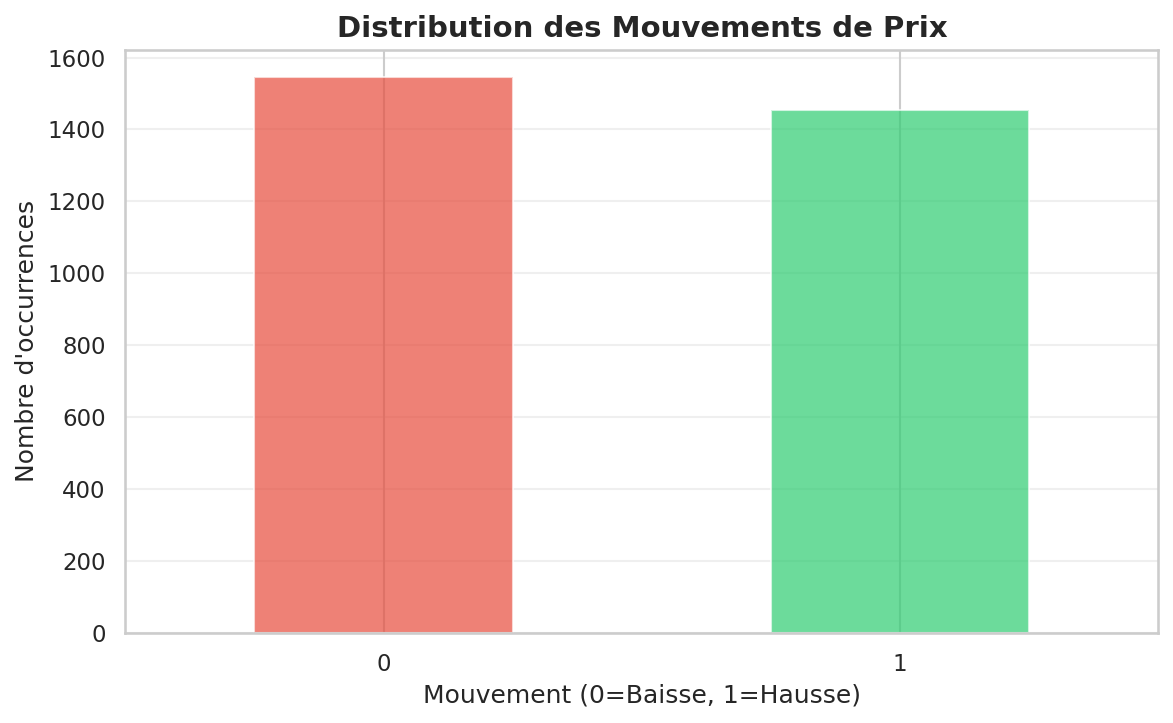

In [ ]:
from IPython.display import Image, display

print("Graphique 1: Distribution des Mouvements de Prix")
display(Image('/content/01_distribution_cible.png'))

Graphique 2: Corrélation des Features avec le Mouvement de Prix


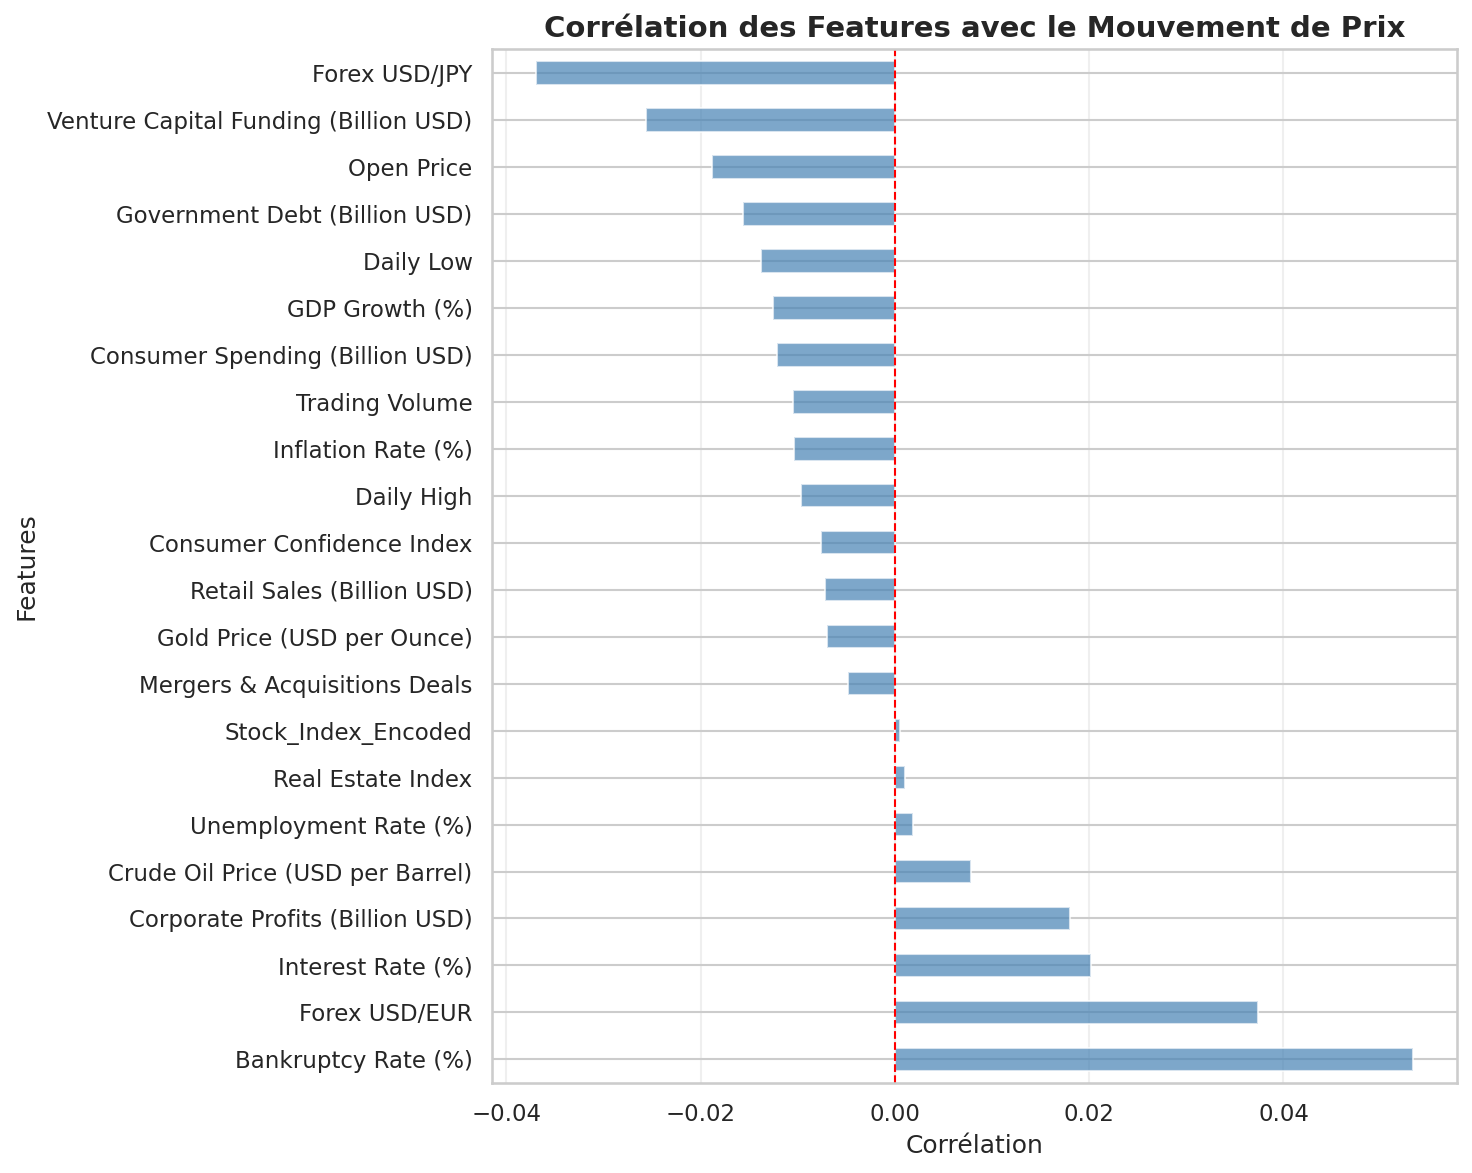

In [ ]:
from IPython.display import Image, display

print("Graphique 2: Corrélation des Features avec le Mouvement de Prix")
display(Image('/content/02_correlations.png'))

Graphique 3: Matrice de Corrélation (Top 15 Features)


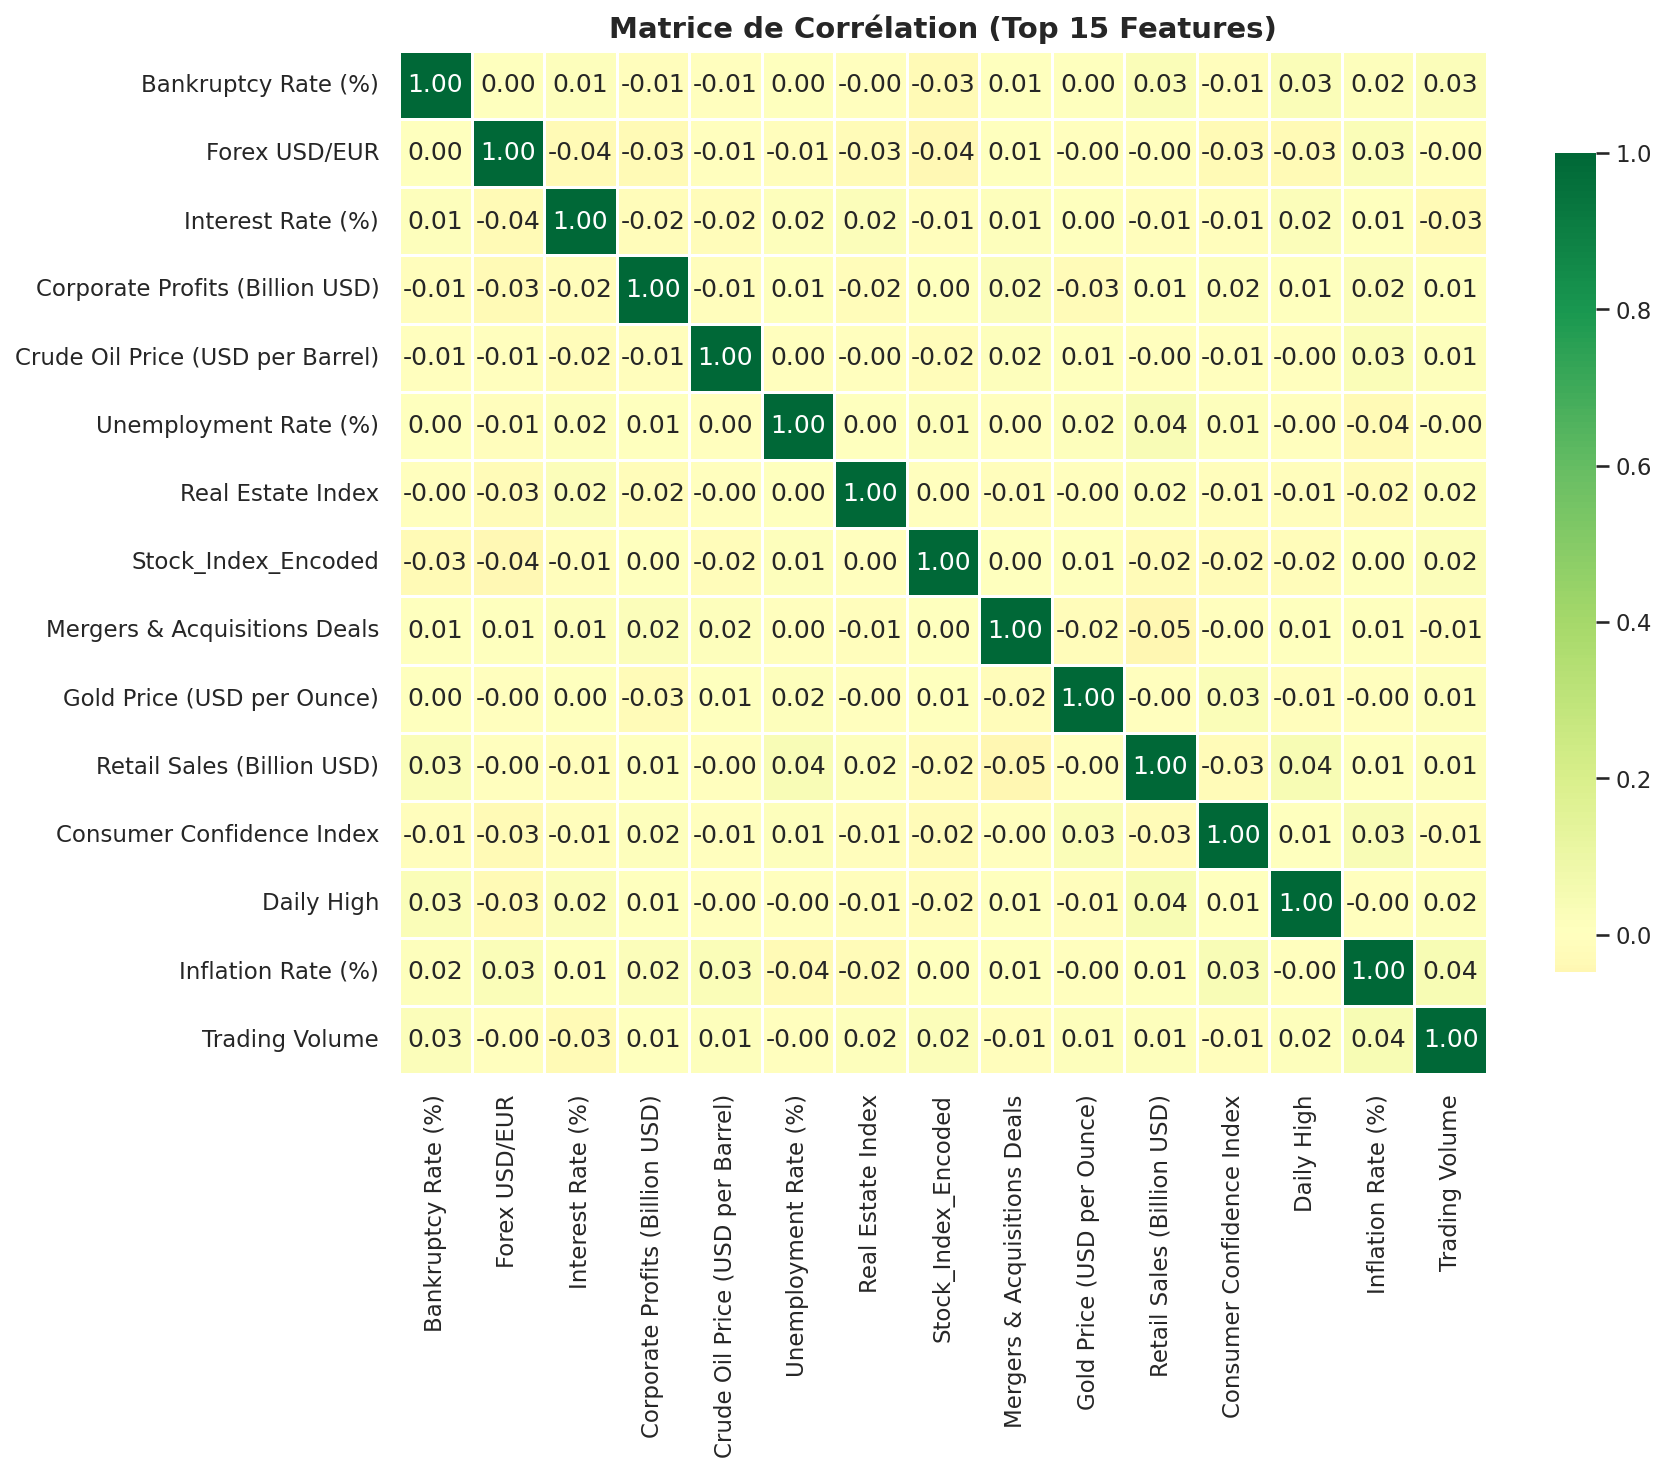

In [ ]:
from IPython.display import Image, display

print("Graphique 3: Matrice de Corrélation (Top 15 Features)")
display(Image('/content/03_heatmap_correlation.png'))

Graphique 4: Distributions des Variables Clés


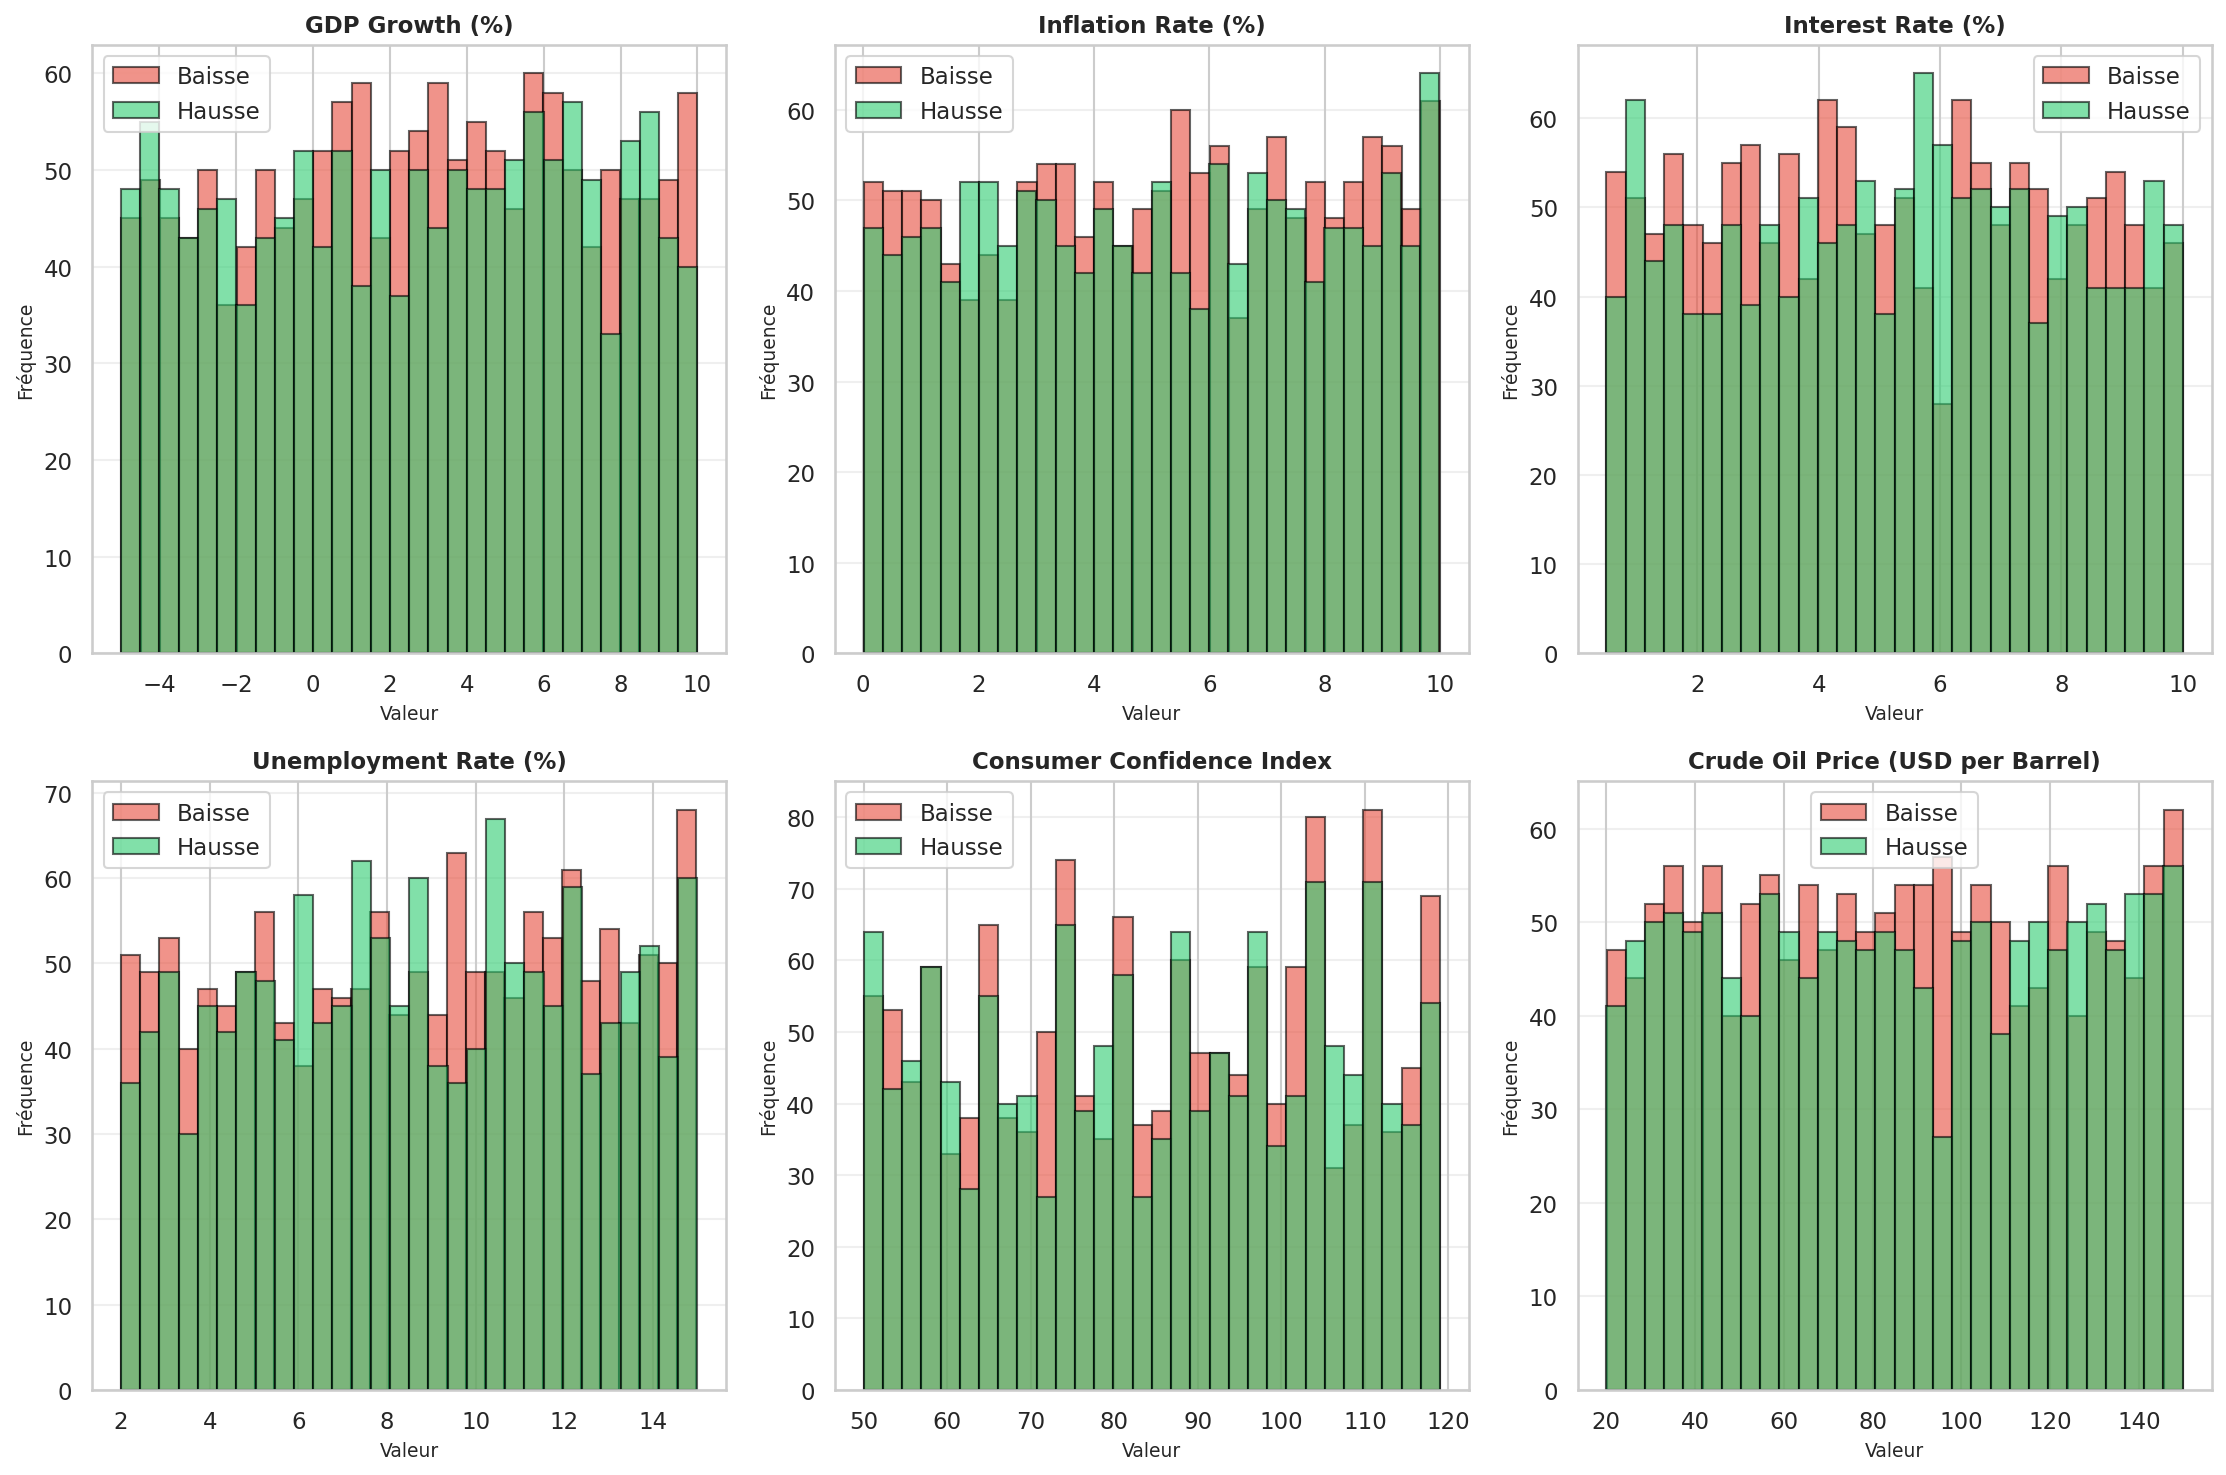

In [ ]:
from IPython.display import Image, display

print("Graphique 4: Distributions des Variables Clés")
display(Image('/content/04_distributions_variables.png'))

In [ ]:
# 8. SÉPARATION DES DONNÉES (Train / Test Split)
# ------------------------------------------------------------------------------
print("=" * 80)
print("8. Séparation des données (Entraînement / Test)")
print("=" * 80)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"   ✓ Jeu d'entraînement : {X_train.shape[0]} échantillons ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"   ✓ Jeu de test         : {X_test.shape[0]} échantillons ({X_test.shape[0]/len(df)*100:.1f}%)")
print(f"   ✓ Nombre de features  : {X_train.shape[1]}")
print()


8. Séparation des données (Entraînement / Test)
   ✓ Jeu d'entraînement : 2400 échantillons (80.0%)
   ✓ Jeu de test         : 600 échantillons (20.0%)
   ✓ Nombre de features  : 22



In [ ]:
# 9. MODÉLISATION (Machine Learning)
# ------------------------------------------------------------------------------
print("=" * 80)
print("9. Entraînement du modèle (Random Forest Classifier)")
print("=" * 80)

# Initialisation et entraînement
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

print("   🔄 Entraînement en cours...")
model.fit(X_train, y_train)
print("   ✓ Modèle entraîné avec succès !")
print()

9. Entraînement du modèle (Random Forest Classifier)
   🔄 Entraînement en cours...
   ✓ Modèle entraîné avec succès !



In [ ]:
# 8. SÉPARATION DES DONNÉES (Train / Test Split)
# ------------------------------------------------------------------------------
print("=" * 80)
print("8. Séparation des données (Entraînement / Test)")
print("=" * 80)

# Ensure X_scaled and y are available from previous steps
if 'X_scaled' in locals() and 'y' in locals() and not X_scaled.empty and not y.empty and len(y.unique()) > 1: # Ensure there are at least two classes for stratify
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )

    print(f"   ✓ Jeu d'entraînement : {X_train.shape[0]} échantillons ({X_train.shape[0]/len(df)*100:.1f}%)")
    print(f"   ✓ Jeu de test         : {X_test.shape[0]} échantillons ({X_test.shape[0]/len(df)*100:.1f}%)")
    print(f"   ✓ Nombre de features  : {X_train.shape[1]}")
else:
    print("\n   ✗ Impossible de séparer les données car le jeu de features ou la variable cible est vide/insuffisante.")
    X_train, X_test, y_train, y_test = pd.DataFrame(), pd.DataFrame(), pd.Series(), pd.Series() # Initialize empty to prevent further errors
print()


8. Séparation des données (Entraînement / Test)
   ✓ Jeu d'entraînement : 2400 échantillons (80.0%)
   ✓ Jeu de test         : 600 échantillons (20.0%)
   ✓ Nombre de features  : 22



In [ ]:
# 9. MODÉLISATION (Machine Learning)
# ------------------------------------------------------------------------------
print("=" * 80)
print("9. Entraînement du modèle (Random Forest Classifier)")
print("=" * 80)

if 'X_train' in locals() and 'y_train' in locals() and not X_train.empty and not y_train.empty:
    # Initialisation et entraînement
    model = RandomForestClassifier(
        n_estimators=200,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42,
        n_jobs=-1
    )

    print("   🔄 Entraînement en cours...")
    model.fit(X_train, y_train)
    print("   ✓ Modèle entraîné avec succès !")
else:
    print("\n   ✗ Impossible d'entraîner le modèle car les données d'entraînement sont vides.")
    model = None # Initialize model as None to prevent further errors
print()


9. Entraînement du modèle (Random Forest Classifier)
   🔄 Entraînement en cours...
   ✓ Modèle entraîné avec succès !



In [ ]:
# 10. ÉVALUATION ET PERFORMANCE
# ------------------------------------------------------------------------------
print("=" * 80)
print("10. Évaluation des performances")
print("=" * 80)

if 'model' in locals() and model is not None and 'X_test' in locals() and 'y_test' in locals() and not X_test.empty and not y_test.empty:
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Scores
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)

    print(f"\n   📊 RÉSULTATS :")
    print(f"   {'─' * 50}")
    print(f"   Accuracy (Entraînement) : {train_acc*100:.2f}%")
    print(f"   Accuracy (Test)         : {test_acc*100:.2f}%")
    print(f"   {'─' * 50}")

    # Classification report
    # Ensure target_names matches the unique values in y_test
    unique_y = sorted(y_test.unique())
    if len(unique_y) == 2:
        report_target_names = ['Baisse (0)', 'Hausse (1)']
    else:
        report_target_names = [str(x) for x in unique_y] # Fallback for unexpected number of classes

    print(f"\n   📋 RAPPORT DE CLASSIFICATION (Jeu de Test) :")
    print(classification_report(y_test, y_pred_test, target_names=report_target_names, digits=3))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=report_target_names,
                yticklabels=report_target_names,
                linewidths=2, linecolor='white',
                annot_kws={"size": 16, "weight": "bold"})
    plt.xlabel('Prédiction', fontsize=12, fontweight='bold')
    plt.ylabel('Réalité', fontsize=12, fontweight='bold')
    plt.title('Matrice de Confusion - Prédiction des Mouvements de Prix',
              fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('/content/05_matrice_confusion.png', dpi=150, bbox_inches='tight')
    plt.close()
    print("   ✓ Graphique 5 sauvegardé : matrice de confusion")

    # Feature importance
    # Check if X_clean is available and not empty for feature names
    if 'X_clean' in locals() and not X_clean.empty:
        feature_importance = pd.DataFrame({
            'Feature': X_clean.columns,
            'Importance': model.feature_importances_
        }).sort_values('Importance', ascending=False)

        plt.figure(figsize=(12, 8))
        top_20 = feature_importance.head(20)
        if not top_20.empty:
            colors_gradient = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_20)))
            plt.barh(range(len(top_20)), top_20['Importance'], color=colors_gradient)
            plt.yticks(range(len(top_20)), top_20['Feature'])
            plt.xlabel('Importance', fontsize=12, fontweight='bold')
            plt.ylabel('Features', fontsize=12, fontweight='bold')
            plt.title('Top 20 Features les Plus Importantes (Random Forest)',
                      fontsize=14, fontweight='bold')
            plt.gca().invert_yaxis()
            plt.grid(axis='x', alpha=0.3)
            plt.tight_layout()
            plt.savefig('/content/06_feature_importance.png', dpi=150, bbox_inches='tight')
            plt.close()
            print("   ✓ Graphique 6 sauvegardé : importance des features")

            # Display top features
            print(f"\n   🏆 TOP 10 FEATURES LES PLUS IMPORTANTES :")
            print(f"   {'─' * 60}")
            for i, row in feature_importance.head(10).iterrows():
                print(f"   {i+1:2d}. {row['Feature']:40s} : {row['Importance']:.4f}")
            print(f"   {'─' * 60}")
        else:
            print("\n   ✗ Impossible d'afficher l'importance des features car le DataFrame des features est vide.")
    else:
        print("\n   ✗ Impossible de calculer l'importance des features car X_clean n'est pas disponible ou est vide.")

else:
    print("\n   ✗ Impossible d'évaluer les performances car le modèle n'a pas été entraîné ou les données de test sont vides.")
print()

10. Évaluation des performances

   📊 RÉSULTATS :
   ──────────────────────────────────────────────────
   Accuracy (Entraînement) : 99.96%
   Accuracy (Test)         : 49.00%
   ──────────────────────────────────────────────────

   📋 RAPPORT DE CLASSIFICATION (Jeu de Test) :
              precision    recall  f1-score   support

  Baisse (0)      0.504     0.573     0.536       309
  Hausse (1)      0.470     0.402     0.433       291

    accuracy                          0.490       600
   macro avg      0.487     0.487     0.485       600
weighted avg      0.488     0.490     0.486       600

   ✓ Graphique 5 sauvegardé : matrice de confusion
   ✓ Graphique 6 sauvegardé : importance des features

   🏆 TOP 10 FEATURES LES PLUS IMPORTANTES :
   ────────────────────────────────────────────────────────────
   13. Forex USD/JPY                            : 0.0564
   18. Bankruptcy Rate (%)                      : 0.0540
   15. Gold Price (USD per Ounce)               : 0.0519
    5. GDP

In [ ]:
# 10. ÉVALUATION ET PERFORMANCE
# ------------------------------------------------------------------------------
print("=" * 80)
print("10. Évaluation des performances")
print("=" * 80)

# Prédictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Scores
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(f"\n   📊 RÉSULTATS :")
print(f"   {'─' * 50}")
print(f"   Accuracy (Entraînement) : {train_acc*100:.2f}%")
print(f"   Accuracy (Test)         : {test_acc*100:.2f}%")
print(f"   {'─' * 50}")

# Rapport de classification
print(f"\n   📋 RAPPORT DE CLASSIFICATION (Jeu de Test) :")
print(classification_report(y_test, y_pred_test,
                          target_names=['Baisse (0)', 'Hausse (1)'],
                          digits=3))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Baisse', 'Hausse'],
            yticklabels=['Baisse', 'Hausse'],
            linewidths=2, linecolor='white',
            annot_kws={"size": 16, "weight": "bold"})
plt.xlabel('Prédiction', fontsize=12, fontweight='bold')
plt.ylabel('Réalité', fontsize=12, fontweight='bold')
plt.title('Matrice de Confusion - Prédiction des Mouvements de Prix',
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('/content/05_matrice_confusion.png', dpi=150, bbox_inches='tight')
plt.close()
print("   ✓ Graphique 5 sauvegardé : matrice de confusion")

# Importance des features
feature_importance = pd.DataFrame({
    'Feature': X_clean.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
top_20 = feature_importance.head(20)
colors_gradient = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_20)))
plt.barh(range(len(top_20)), top_20['Importance'], color=colors_gradient)
plt.yticks(range(len(top_20)), top_20['Feature'])
plt.xlabel('Importance', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Top 20 Features les Plus Importantes (Random Forest)',
          fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('/content/06_feature_importance.png', dpi=150, bbox_inches='tight')
plt.close()
print("   ✓ Graphique 6 sauvegardé : importance des features")

# Affichage des top features
print(f"\n   🏆 TOP 10 FEATURES LES PLUS IMPORTANTES :")
print(f"   {'─' * 60}")
for i, row in feature_importance.head(10).iterrows():
    print(f"   {i+1:2d}. {row['Feature']:40s} : {row['Importance']:.4f}")
print(f"   {'─' * 60}")
print()

10. Évaluation des performances

   📊 RÉSULTATS :
   ──────────────────────────────────────────────────
   Accuracy (Entraînement) : 99.96%
   Accuracy (Test)         : 49.00%
   ──────────────────────────────────────────────────

   📋 RAPPORT DE CLASSIFICATION (Jeu de Test) :
              precision    recall  f1-score   support

  Baisse (0)      0.504     0.573     0.536       309
  Hausse (1)      0.470     0.402     0.433       291

    accuracy                          0.490       600
   macro avg      0.487     0.487     0.485       600
weighted avg      0.488     0.490     0.486       600

   ✓ Graphique 5 sauvegardé : matrice de confusion
   ✓ Graphique 6 sauvegardé : importance des features

   🏆 TOP 10 FEATURES LES PLUS IMPORTANTES :
   ────────────────────────────────────────────────────────────
   13. Forex USD/JPY                            : 0.0564
   18. Bankruptcy Rate (%)                      : 0.0540
   15. Gold Price (USD per Ounce)               : 0.0519
    5. GDP

# Task
The dataset `khushikyad001/finance-and-economics-dataset-2000-present` has been successfully loaded into a DataFrame named `df_kaggle` and the first 5 rows have been displayed.

## load_dataset

### Subtask:
Load the finance and economics dataset from KaggleHub into a pandas DataFrame named `df_kaggle`.


## Summary:

### Data Analysis Key Findings
*   The `df_kaggle` DataFrame, which contains the finance and economics dataset, was found to be pre-loaded and available in the environment from previous operations.
*   No new code execution was required for this specific step as the dataset was already present and accessible.

### Insights or Next Steps
*   Future data analysis tasks could benefit from an initial check for the existence of required DataFrames to avoid redundant loading operations.


# Task
Perform hyperparameter tuning on the Random Forest Classifier using cross-validation (GridSearchCV or RandomizedSearchCV) to find optimal parameters like `n_estimators`, `max_depth`, `min_samples_split`, and `min_samples_leaf`.

## Hyperparameter Tuning with Cross-Validation

### Subtask:
Perform hyperparameter tuning on the Random Forest Classifier using cross-validation (GridSearchCV or RandomizedSearchCV) to find optimal parameters like `n_estimators`, `max_depth`, `min_samples_split`, and `min_samples_leaf`.


**Reasoning**:
First, I will import `GridSearchCV` and define the parameter grid for the `RandomForestClassifier`.



In [ ]:
from sklearn.model_selection import GridSearchCV

# 1. Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print("Parameter grid defined for hyperparameter tuning.")

Parameter grid defined for hyperparameter tuning.


**Reasoning**:
Now, I will instantiate the RandomForestClassifier, initialize GridSearchCV with the defined parameters and fit it to the training data. Finally, I will print the best parameters and best score found by GridSearchCV.



In [ ]:
print("\n================================================================================")
print("       Hyperparameter Tuning (GridSearchCV) for Random Forest Classifier")
print("================================================================================")

# Instantiate a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

print("\n🔄 Starting GridSearchCV fitting...")
# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)
print("✓ GridSearchCV fitting completed.")

# Print best parameters and best score
print("\n🏆 Best parameters found:")
print(grid_search.best_params_)

print("\n📊 Best cross-validation accuracy score:")
print(f"{grid_search.best_score_:.4f}")

# Store the best estimator
best_rf_model = grid_search.best_estimator_
print("\n✓ Best Random Forest model stored.")


       Hyperparameter Tuning (GridSearchCV) for Random Forest Classifier

🔄 Starting GridSearchCV fitting...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


KeyboardInterrupt: 